<a href="https://colab.research.google.com/github/kganesh1999/5292353_CAP5610_Assignment/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from surprise import KNNBasic, SVD, Reader, accuracy, Dataset
from surprise.model_selection import cross_validate, train_test_split
%matplotlib inline

## Read Dataset

In [5]:
ratings = pd.read_csv('ratings_small.csv')
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [6]:
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

## Performance Evaluation of various model


### Probability Mass Function

In [7]:
pmf_svd = SVD(biased = False)
cv_pmf = cross_validate(pmf_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0087  1.0045  1.0100  1.0105  1.0113  1.0090  0.0024  
MAE (testset)     0.7802  0.7748  0.7803  0.7793  0.7774  0.7784  0.0021  
Fit time          4.98    5.03    5.02    5.10    5.03    5.03    0.04    
Test time         0.25    0.16    0.15    0.16    0.27    0.20    0.05    


In [8]:
cv_pmf

{'fit_time': (4.98458456993103,
  5.025357007980347,
  5.021892309188843,
  5.098491191864014,
  5.029857158660889),
 'test_mae': array([0.78021635, 0.77481003, 0.7803001 , 0.77928065, 0.77735577]),
 'test_rmse': array([1.00872984, 1.00445096, 1.0100094 , 1.01051898, 1.01133026]),
 'test_time': (0.24716854095458984,
  0.1560378074645996,
  0.14882230758666992,
  0.15981841087341309,
  0.2701394557952881)}

In [9]:
print('Average MAE for PMF Collaborative Filtering: ', cv_pmf['test_mae'].mean())
print('Average RMSE for PMF Collaborative Filtering: ', cv_pmf['test_rmse'].mean())

Average MAE for PMF Collaborative Filtering:  0.7783925794679601
Average RMSE for PMF Collaborative Filtering:  1.0090078878291948


### User-based CF

In [22]:
sim_options = {'user_based': True}
user_based_cf = KNNBasic(sim_options=sim_options)
cv_ub = cross_validate(user_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9650  0.9679  0.9608  0.9698  0.9714  0.9670  0.0038  
MAE (testset)     0.7429  0.7443  0.7390  0.7447  0.7454  0.7433  0.0023  
Fit time          0.14    0.17    0.17    0.46    0.35    0.26    0.13    
Test time         1.85    1.91    3.42    4.24    3.13    2.91    0.92    


In [23]:
print('Average MAE for User-based Collaborative Filtering: ', cv_ub['test_mae'].mean())
print('Average RMSE for User-based Collaborative Filtering: ', cv_ub['test_rmse'].mean())

Average MAE for User-based Collaborative Filtering:  0.7432559106647483
Average RMSE for User-based Collaborative Filtering:  0.9669914849698678


### Item based CF

In [ ]:
sim_options = {'user_based': False}
item_based_cf = KNNBasic(sim_options=sim_options)
cv_ib = cross_validate(item_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9274  0.9357  0.9385  0.9391  0.9351  0.9352  0.0042  
MAE (testset)     0.7156  0.7196  0.7239  0.7229  0.7237  0.7211  0.0032  
Fit time          3.81    4.05    4.01    3.83    4.37    4.01    0.20    
Test time         8.09    8.18    8.27    8.02    8.04    8.12    0.09    


In [ ]:
print('Average MAE for Item-based Collaborative Filtering: ', cv_ib['test_mae'].mean())
print('Average RMSE for Item-based Collaborative Filtering: ', cv_ib['test_rmse'].mean())

Average MAE for Item-based Collaborative Filtering:  0.7211047824140211
Average RMSE for Item-based Collaborative Filtering:  0.935158563309338


## Comparison of similarity metrics

### User-based CF

#### Cosine

In [ ]:
sim_options = {'name':'cosine', 'user_based': True}
ub_cosine = KNNBasic(sim_options=sim_options);
cv_ub_cosine = cross_validate(ub_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9896  0.9988  0.9950  0.9891  0.9915  0.9928  0.0036  
MAE (testset)     0.7651  0.7727  0.7701  0.7639  0.7643  0.7672  0.0035  
Fit time          0.37    0.42    0.43    0.41    0.44    0.42    0.02    
Test time         1.76    1.88    1.74    1.88    1.75    1.80    0.07    


#### MSD

In [ ]:
sim_options = {'name':'msd', 'user_based': True}
ub_msd = KNNBasic(sim_options=sim_options);
cv_ub_msd = cross_validate(ub_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9658  0.9668  0.9715  0.9747  0.9633  0.9684  0.0041  
MAE (testset)     0.7450  0.7451  0.7456  0.7470  0.7396  0.7445  0.0025  
Fit time          0.14    0.17    0.18    0.17    0.18    0.17    0.01    
Test time         1.91    1.73    1.91    1.76    1.90    1.84    0.08    


#### Pearson

In [ ]:
sim_options = {'name':'pearson', 'user_based': True}
ub_pearson = KNNBasic(sim_options=sim_options);
cv_ub_pearson = cross_validate(ub_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9962  0.9958  0.9997  1.0050  0.9987  0.9991  0.0033  
MAE (testset)     0.7711  0.7689  0.7726  0.7807  0.7733  0.7733  0.0040  
Fit time          0.56    0.59    0.59    0.57    0.60    0.58    0.01    
Test time         1.71    1.88    1.71    1.86    1.72    1.77    0.08    


#### Observation

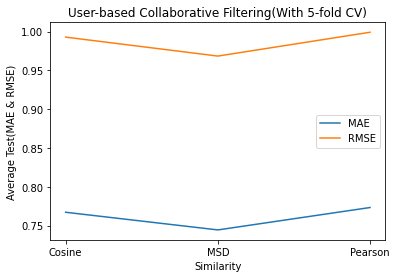

In [ ]:
x = [0,1,2]
y_mae = [cv_ub_cosine['test_mae'].mean(),cv_ub_msd['test_mae'].mean(),cv_ub_pearson['test_mae'].mean()]
y_rmse = [cv_ub_cosine['test_rmse'].mean(),cv_ub_msd['test_rmse'].mean(),cv_ub_pearson['test_rmse'].mean()]
plt.plot(x, y_mae)
plt.plot(x, y_rmse)
plt.title('User-based Collaborative Filtering(With 5-fold CV)')
plt.legend(['MAE','RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Average Test(MAE & RMSE)')
plt.show()

### Item-based CF

#### Cosine

In [ ]:
sim_options = {'name':'cosine', 'user_based': False}
ib_cosine = KNNBasic(sim_options=sim_options);
cv_ib_cosine = cross_validate(ib_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9962  1.0067  0.9944  0.9914  0.9924  0.9962  0.0055  
MAE (testset)     0.7742  0.7847  0.7757  0.7738  0.7732  0.7763  0.0043  
Fit time          14.25   15.88   16.56   16.43   14.21   15.46   1.03    
Test time         8.09    8.05    7.99    7.91    7.78    7.96    0.11    


#### MSD

In [ ]:
sim_options = {'name':'msd', 'user_based': False}
ib_msd = KNNBasic(sim_options=sim_options);
cv_ib_msd = cross_validate(ib_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9325  0.9285  0.9429  0.9380  0.9322  0.9348  0.0050  
MAE (testset)     0.7189  0.7168  0.7255  0.7261  0.7176  0.7210  0.0040  
Fit time          3.91    4.09    3.91    3.93    4.01    3.97    0.07    
Test time         7.72    8.39    8.14    8.17    8.13    8.11    0.22    


#### Pearson

In [ ]:
sim_options = {'name':'pearson', 'user_based': False}
ib_pearson = KNNBasic(sim_options=sim_options);
cv_ib_pearson = cross_validate(ib_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9937  0.9859  0.9864  0.9942  0.9862  0.9893  0.0038  
MAE (testset)     0.7716  0.7678  0.7649  0.7685  0.7672  0.7680  0.0022  
Fit time          19.01   19.61   19.16   19.07   19.00   19.17   0.23    
Test time         7.33    7.90    7.81    7.91    7.84    7.76    0.22    


#### Observation

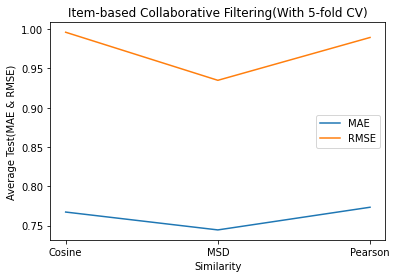

In [ ]:
x = [0,1,2]
y_mae = [cv_ib_cosine['test_mae'].mean(),cv_ib_msd['test_mae'].mean(),cv_ib_pearson['test_mae'].mean()]
y_rmse = [cv_ib_cosine['test_rmse'].mean(),cv_ib_msd['test_rmse'].mean(),cv_ib_pearson['test_rmse'].mean()]
plt.plot(x, y_mae)
plt.plot(x, y_rmse)
plt.title('Item-based Collaborative Filtering(With 5-fold CV)')
plt.legend(['MAE','RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Average Test(MAE & RMSE)')
plt.show()

## Impact of Number of neighbours on model

In [11]:
trainset, testset = train_test_split(data, test_size = 0.25, random_state = 42)

#### User-based CF

In [ ]:
ubc_nn_mae = []
ubc_nn_rmse = []
k1 = list(np.arange(1,100,1))
for i in k1:
  ubc_nn = KNNBasic(k = i, sim_options = {'user_based' : True})
  ubc_nn.fit(trainset)
  predictions = ubc_nn.test(testset)
  ubc_nn_mae.append(accuracy.mae(predictions))
  ubc_nn_rmse.append(accuracy.rmse(predictions))

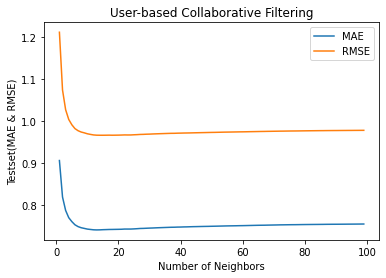

In [13]:
plt.plot(k1,ubc_nn_mae)
plt.plot(k1,ubc_nn_rmse)
plt.xlabel('Number of Neighbors')
plt.ylabel('Testset(MAE & RMSE)')
plt.legend(['MAE','RMSE'])
plt.title('User-based Collaborative Filtering')
plt.show()

In [20]:
#Best K
k_ubc = ubc_nn_rmse.index(min(ubc_nn_rmse))+1
print('Best Value of K : ', k_ubc)
print('Minimum RMSE : ', min(ubc_nn_rmse))

Best Value of K :  15
Minimum RMSE :  0.9663589276453397


#### Item-based CF

In [ ]:
ibc_nn_mae = []
ibc_nn_rmse = []
for i in k1:
  ibc_nn = KNNBasic(k = i, sim_options = {'user_based' : False})
  ibc_nn.fit(trainset)
  predictions = ibc_nn.test(testset)
  ibc_nn_mae.append(accuracy.mae(predictions))
  ibc_nn_rmse.append(accuracy.rmse(predictions))

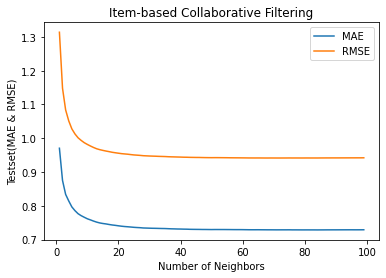

In [15]:
plt.plot(k1,ibc_nn_mae)
plt.plot(k1,ibc_nn_rmse)
plt.xlabel('Number of Neighbors')
plt.ylabel('Testset(MAE & RMSE)')
plt.legend(['MAE','RMSE'])
plt.title('Item-based Collaborative Filtering')
plt.show()

In [19]:
#Best K
k_ibc = ibc_nn_rmse.index(min(ibc_nn_rmse))+1
print('Best Value of K : ', k_ibc)
print('Minimum RMSE : ', min(ibc_nn_rmse))

Best Value of K :  68
Minimum RMSE :  0.941359509155313
